In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1.)

## Laden der Daten

In [2]:
data_path = "resources/ml-100k/"
columns = ["User", "Item", "Rating", "Timestamp"]
training = pd.read_csv(data_path + "ua.base", delim_whitespace=True, header=None, names=columns)
training

,User,Item,Rating,Timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
90565,943,1047,2,875502146
90566,943,1074,4,888640250
90567,943,1188,3,888640250
90568,943,1228,3,888640275


In [3]:
test = pd.read_csv(data_path + "ua.test", delim_whitespace=True, header=None, names=columns)
test

,User,Item,Rating,Timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201
...,...,...,...,...
9425,943,232,4,888639867
9426,943,356,4,888639598
9427,943,570,1,888640125
9428,943,808,4,888639868


In [3]:
genres = ["Action", "Adventure", "Animation", "Chidrens", "Comdey", "Crime", "Documentary", "Drama", "Fantasy", 
          "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]


item_names = ["ID", "Title", "Release date", "Video release date", "IMDb Url", "unknown"]
item_names.extend(genres)
items = pd.read_csv(data_path + "u.item", delimiter="|", header=None, encoding = "ISO-8859-1", names=item_names)
items = items.set_index("ID")
items

,Title,Release date,Video release date,IMDb Url,unknown,Action,Adventure,Animation,Chidrens,Comdey,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ID,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Matrizen erstellen

In [5]:
training_merged = training.merge(items, left_on="Item", right_on="ID")
training_merged

,User,Item,Rating,Timestamp,Title,Release date,Video release date,IMDb Url,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5,874965758,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4,888550871,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,4,883599478,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,1,4,877888877,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,1,3,882140487,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90565,863,1679,3,889289491,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,...,0,0,0,0,0,1,0,1,0,0
90566,863,1680,2,889289570,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,...,0,0,0,0,0,1,0,0,0,0
90567,883,1656,5,891692168,Little City (1998),20-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Little+City+(...,0,0,...,0,0,0,0,0,1,0,0,0,0
90568,896,1681,3,887160722,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
matrix_training = training_merged.pivot(index="User", columns="Item", values="Rating")
matrix_training = matrix_training.fillna("NA")
matrix_training = matrix_training.applymap(lambda x: 0 if x == "NA" else 1)
matrix_training

Item,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
User,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_merged = test.merge(items, left_on="Item", right_on="ID")
test_merged

,User,Item,Rating,Timestamp,Title,Release date,Video release date,IMDb Url,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,20,4,887431883,Angels and Insects (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Angels%20and%...,0,0,...,0,0,0,0,0,1,0,0,0,0
1,63,20,3,875748004,Angels and Insects (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Angels%20and%...,0,0,...,0,0,0,0,0,1,0,0,0,0
2,115,20,3,881171009,Angels and Insects (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Angels%20and%...,0,0,...,0,0,0,0,0,1,0,0,0,0
3,189,20,5,893264466,Angels and Insects (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Angels%20and%...,0,0,...,0,0,0,0,0,1,0,0,0,0
4,296,20,5,884196921,Angels and Insects (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Angels%20and%...,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9425,934,1425,1,891197851,I'll Do Anything (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?I'll%20Do%20A...,0,0,...,0,0,0,0,0,0,0,0,0,0
9426,936,818,4,886832903,Girl 6 (1996),22-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Girl%206%20(1...,0,0,...,0,0,0,0,0,0,0,0,0,0
9427,936,1258,2,886833281,Trial and Error (1997),30-May-1997,NaN,http://us.imdb.com/M/title-exact?Trial%20and%2...,0,0,...,0,0,0,0,0,1,0,0,0,0
9428,943,570,1,888640125,Wyatt Earp (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Wyatt%20Earp%...,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
matrix_test = test_merged.pivot(index="User", columns="Item", values="Rating")
matrix_test = matrix_test.fillna("NA")
matrix_test = matrix_test.applymap(lambda x: 0 if x == "NA" else 1)
matrix_test

Item,1,2,3,4,5,6,7,8,9,10,...,1591,1592,1600,1612,1617,1646,1653,1656,1662,1664
User,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Anpassung der Matrizen bezüglich der Vergleichbarkeit

In [9]:
training_columns = set(matrix_training.columns)
test_columns = set(matrix_test.columns)

intersection = list(training_columns.intersection(test_columns))
intersection[:10]



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [10]:
matrix_training = matrix_training[intersection]
matrix_training

Item,1,2,3,4,5,6,7,8,9,10,...,1558,1591,1592,1600,1612,1617,1646,1656,1662,1664
User,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
matrix_test = matrix_test[intersection]
matrix_test

Item,1,2,3,4,5,6,7,8,9,10,...,1558,1591,1592,1600,1612,1617,1646,1656,1662,1664
User,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
training_index = matrix_training.index
test_index = matrix_test.index
np.array_equal(training_index, test_index)

True

# 2.)

In [13]:
def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2)).mean()

In [14]:
def SGD(R, learning_rate, k, epochs=1):
    m, n = R.shape
    U = np.random.rand(m, k)
    V = np.random.rand(n, k)
    S = R.nonzero()

    # RMSE Berechnung direkt in der Funktion, da Berechnung außerhalb sehr aufwändig...
    rmses = []

    # Etwas unschön. Macht aus dem Tupel zweier Listen eine Liste von Tuples. Notwendig um einen random shuffle durchführen zu können.
    iList, jList = S
    temp = []
    for i in range(len(iList)):
        temp.append((iList[i], jList[i]))
    S = temp


    # Eigentliche Berechnung.
    np.random.shuffle(S)

    for epoch in range(epochs):
        for (i, j) in S:
            r = R[i][j]
            sum = 0
            for s in range (k):
                sum += U[i][s] * V[j][s]
            e = r - sum
            u_plus = 0
            v_plus = 0
            for q in range (k): 
                u_plus = U[i][q] + learning_rate * e * V[j][q]
            for q in range (k): 
                v_plus = V[j][q] + learning_rate * e * U[i][q]
            for q in range (k): 
                U[i][q] = u_plus
                V[j][q] = v_plus
        
        # RMSE für aktuelle Epoche hinzufügen.
        rmses.append(RMSE(U @ V.T, R))
    return (U, V.T, np.array(rmses))


# 3.)

## Trainingsset

In [20]:
U, I, rmses = SGD(R=matrix_training.values, k=5, learning_rate=0.05)
rmse = rmses.mean()
rmse


0.9621420893004695

## Testset

In [19]:
U, I, rmses = SGD(R=matrix_test.values, k=5, learning_rate=0.05)
rmse = rmses.mean()
rmse

1.029464441517798

# 4.)

In [17]:
epochs = 50

U_train, I_train, rmses_train = SGD(matrix_training.values, 0.05, 5, epochs)
U_test, I_test, rmses_test = SGD(matrix_test.values, 0.05, 5, epochs)



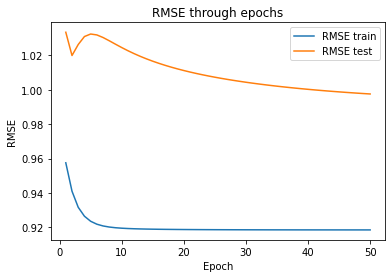

In [18]:
xv = np.arange(1, epochs + 1)
fig, ax = plt.subplots()
ax.plot(xv, rmses_train, label="RMSE train")
ax.plot(xv, rmses_test, label="RMSE test")
ax.set_xlabel("Epoch")
ax.set_ylabel("RMSE")
plt.legend()
plt.title("RMSE through epochs")
plt.show()
